In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('movies_metadata.csv', low_memory=False)

# Building the Recommendation System

In [3]:
c =  df['vote_average'].mean()
c

5.618207215133889

In [6]:
m = df['vote_count'].quantile(0.9) # 90th Quantile of **vote_count**
m

160.0

In [13]:
qm = df[((df['runtime']>150) & (df['revenue']>300000000) & (df['homepage'].notna()))]
# creating a sub-dataframe that only has movies with a high runtime(no short films) a high revenue and a non-null homepage

In [14]:
qm.shape

(27, 24)

In [18]:
qm = qm[(qm['vote_count'] >= m)]
# Filtering out movies vith votes_count greater than the 90th quantile

In [19]:
qm.shape # All movies have votes_count greater than the 90th quantile

(27, 24)

In [21]:
def wr(x, m=m, c=c): # Formula to calculate (IMDB) rating of movies)
    v=x['vote_count']
    r=x['vote_average']
    return (v/(v+m) * r) + (m/(m+v) * c)    

In [24]:
qm['score'] = qm.apply(wr, axis=1)

In [25]:
qm

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,7.462032
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,...,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0,7.459025
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,7.957900
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,7.951149
7000,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,...,1.118889e+09,201.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0,8.052649
10554,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",150000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/,674,tt0330373,en,Harry Potter and the Goblet of Fire,"Harry starts his fourth year at Hogwarts, comp...",...,8.959210e+08,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Dark And Difficult Times Lie Ahead.,Harry Potter and the Goblet of Fire,False,7.5,5758.0,7.449124
11008,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",200000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,58,tt0383574,en,Pirates of the Caribbean: Dead Man's Chest,Captain Jack Sparrow works his way out of a bl...,...,1.065660e+09,151.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jack is back!,Pirates of the Caribbean: Dead Man's Chest,False,7.0,5380.0,6.960093
11067,False,"{'id': 8537, 'name': 'Superman Collection', 'p...",270000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.superman.com,1452,tt0348150,en,Superman Returns,Superman returns to discover his 5-year absenc...,...,3.910812e+08,154.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Superman Returns,False,5.4,1429.0,5.421972
11827,False,"{'id': 295, 'name': 'Pirates of the Caribbean ...",30

In [32]:
qm = qm.sort_values('score', ascending=False) # Sorting the scores in decending order

In [30]:
qm

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
12481,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,...,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Why So Serious?,The Dark Knight,False,8.3,12269.0,8.265477
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
22879,False,NaN,165000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.interstellarmovie.net/,157336,tt0816692,en,Interstellar,Interstellar chronicles the adventures of a gr...,...,6.751200e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Mankind was born on Earth. It was never meant ...,Interstellar,False,8.1,11187.0,8.065005
7000,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",94000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net,122,tt0167260,en,The Lord of the Rings: The Return of the King,Aragorn is revealed as the heir to the ancient...,...,1.118889e+09,201.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The eye of the enemy is moving.,The Lord of the Rings: The Return of the King,False,8.1,8226.0,8.052649
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",...,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,7.957900
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,...,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,7.951149
22131,False,NaN,100000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://www.thewolfofwallstreet.com/,106646,tt0993846,en,The Wolf of Wall Street,A New York stockbroker refuses to cooperate in...,...,3.920007e+08,180.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,EARN. SPEND. PARTY.,The Wolf of Wall Street,False,7.9,6768.0,7.847303
13605,False,NaN,70000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",http://www.inglouriousbasterds-movie.com/,16869,tt0361748,en,Inglourious Basterds,"In Nazi-occupied France during World War II, a...",...,3.191310e+08,153.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,Once upon a time in Nazi occupied France...,Inglourious Basterds,False,7.9,6598.0,7.845977
20051,False,NaN,100000000,"[{'id': 18, 'name': 'Drama'}, {'id': 37, 'name...",http://unchainedmovie.com/,68718,tt1853728,en,Django Unchained,"With the help of a German bounty hunter, a fre...",...,4.253682e+08,165.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"Life, liberty and the pursuit of vengeance.",Django Unchained,False,7.8,10297.0,7.766617
18252,False,"{'id': 263, 'name': 'The Dark Knight Collectio...",250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,tt1345836,en,The Dark Knight Rises,Following the death of District Attorney 

In [33]:
qm[['title', 'vote_count', 'vote_average', 'score']].head(10) # Outputting Top 10 movies

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.265477
522,Schindler's List,4436.0,8.3,8.206639
22879,Interstellar,11187.0,8.1,8.065005
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.052649
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149
22131,The Wolf of Wall Street,6768.0,7.9,7.847303
13605,Inglourious Basterds,6598.0,7.9,7.845977
20051,Django Unchained,10297.0,7.8,7.766617
18252,The Dark Knight Rises,9263.0,7.6,7.566350


Text(0.5, 1.0, 'Most Votes')

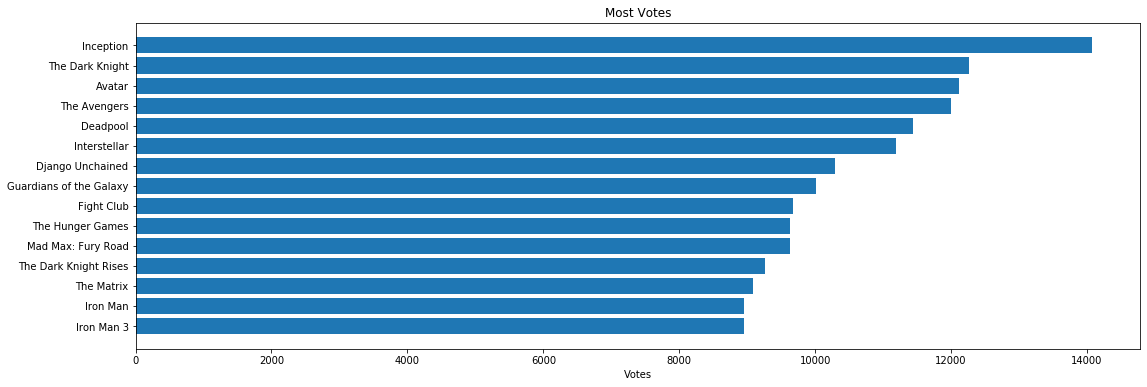

In [36]:
# Showing the Most Voted Movies, visually, in a bar graph Format

d = df.sort_values('vote_count', ascending=False)

plt.figure(figsize=(18,6))

plt.barh(d['title'].head(15), d['vote_count'].head(15), align='center')
plt.gca().invert_yaxis()
plt.xlabel('Votes')
plt.title('Most Votes')